In [2]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus   import stopwords
from gensim.models import Word2Vec

import matplotlib.pyplot as plt
import pandas            as pd
from bs4 import BeautifulSoup
import requests
import nltk

In [8]:
stopwords = stopwords.words('english')

In [11]:
df = pd.read_csv('Final_Events.csv')
df.head(n=1)

,Title,Desc,Start Date,When,Main Page,Address1,Address2,thumb,image
0,PGL Wallachia S3,Full information about PGL Wallachia S3 Dota 2...,Mar 8,"Sat, Mar 8",https://ggscore.com/en/dota-2/pgl-wallachia-se...,"PGL ESPORTS, Bulevardul Dimitrie Pompeiu 9-9A","Bucharest, Romania",https://encrypted-tbn0.gstatic.com/images?q=tb...,https://encrypted-tbn0.gstatic.com/images?q=tb...


In [12]:
import random

In [116]:
url = random.choice(df['Main Page'])
url

'https://open.spotify.com/concert/4QUulgp5GaCuufUsGTisWe'

In [117]:
items = requests.get(url = url)
soup  = BeautifulSoup(items.content,'html.parser')

In [ ]:
links = soup.find_all("a")
for link in links:
  url = link.get("href")
  print("Link:", link.get("href"), "Text:", link.string)

Link: /concerts Text:  browse all live events
Link: https://maps.google.com/?q=Rialto+Center+for+the+Arts+at+Georgia+State+University%2CAtlanta&ll=33.7568073%2C-84.3892829 Text: Rialto Center for the Arts at Georgia State University, Atlanta
Link: https://www.bandsintown.com/e/105947999?app_id=spt_feed&came_from=281&utm_medium=web&utm_source=spt_feed&utm_campaign=event Text: None
Link: /artist/7sVZlT3DSnlWGiUVVAkOQS/concerts Text: None
Link: /concerts/location/4180439-Atlanta-GA-US Text: See more events in Atlanta, GA, US


In [13]:
tokenizer = RegexpTokenizer(r'\w+')

In [7]:
# nltk.download('stopwords')

In [41]:
# stopwords.words()

In [14]:
documents = [d for d in df['Desc'].fillna(value = '')]
words     = [tokenizer.tokenize(d.lower()) for d in documents ]
words     = [[w for w in d if w not in stopwords] for d in words]

In [15]:
model = Word2Vec(sentences=words, vector_size=100, window=3, min_count=2)

In [69]:
# model.wv.index_to_key

In [16]:
model.wv.similar_by_key('anime')

[('center', 0.4785579442977905),
 ('fun', 0.4725651741027832),
 ('convention', 0.4634937644004822),
 ('day', 0.453180193901062),
 ('sunday', 0.42980679869651794),
 ('tickets', 0.40479522943496704),
 ('comic', 0.4040267765522003),
 ('march', 0.3801400363445282),
 ('school', 0.3801182508468628),
 ('community', 0.37979796528816223)]

In [17]:
from sklearn.manifold import TSNE 
import seaborn as sns

In [18]:
enc = TSNE(n_components=2, random_state=42)

In [19]:
cord = enc.fit_transform(model.wv.vectors)

In [82]:
#model.wv.index_to_key

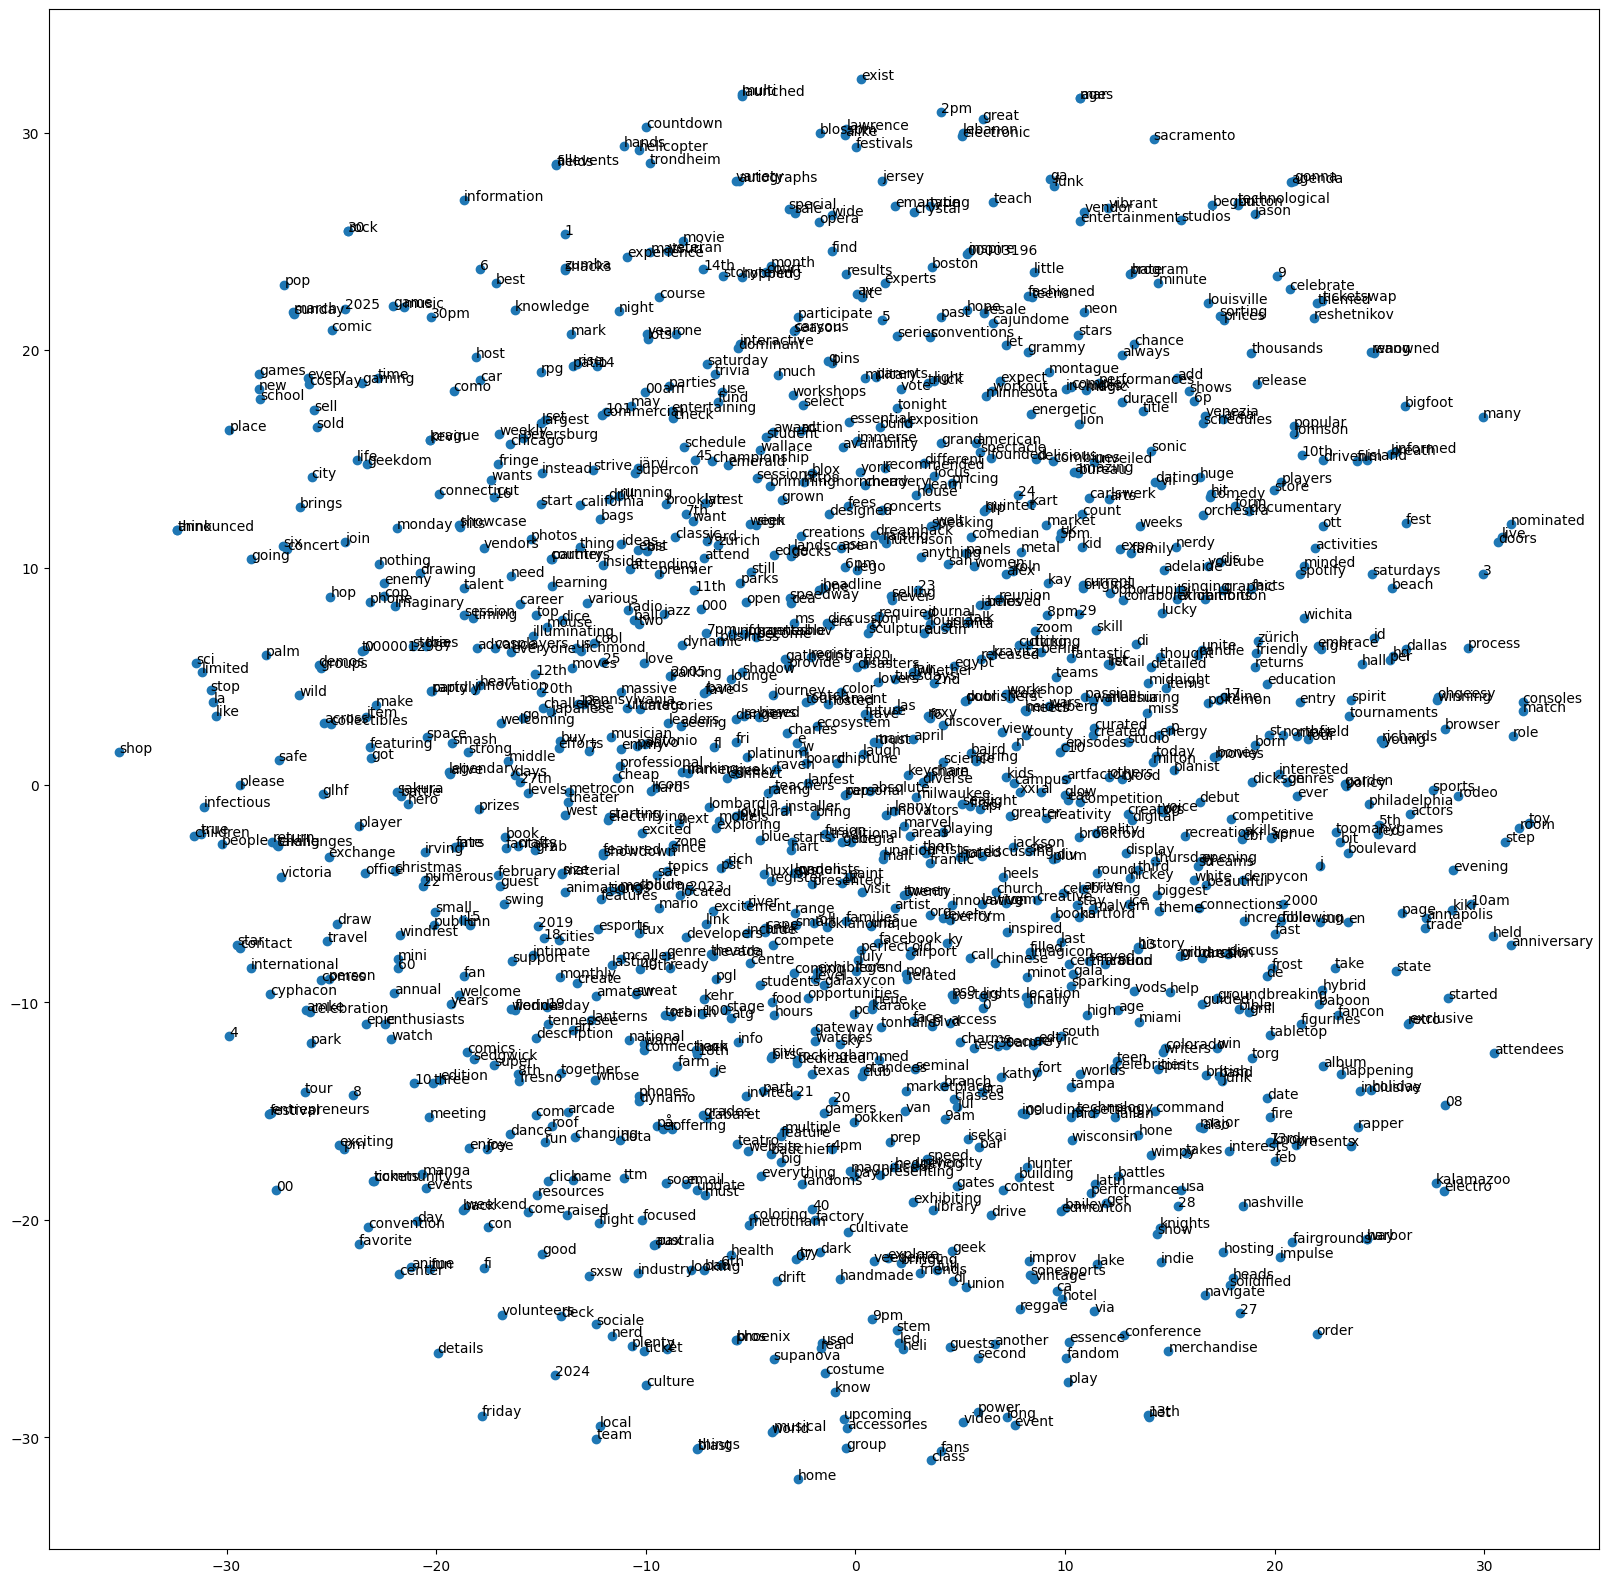

In [20]:
fig = plt.figure(figsize=(20,20))
ax = plt.subplot()
plt.scatter(x = cord[:,0], y = cord[:,1])
for idx , w in enumerate(model.wv.index_to_key):
    ax.text(cord[idx,0],cord[idx,1], s = w)
plt.show()